<a href="https://colab.research.google.com/github/alex20022000/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/blob/main/01_Signal_Processing_Ciani%2BDalle_Rive_Prieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [275]:
# Data
import pandas as pd

# Math
import numpy as np

# Graficas
import matplotlib.pyplot as plt

# Manejo de directorios
import shutil
import os

# Funciones

In [311]:
def graficar_t_VS_muestras(tiempo, datos, xlabel='Tiempo (s)', ylabel='Amplitud', titulo='Gráfico', grid=True):
    """
    Función para graficar datos utilizando matplotlib.

    Args:
        tiempo (list or array): Datos del eje x (tiempo).
        datos (list or array): Datos del eje y (muestras).
        xlabel (str): Etiqueta para el eje x. Default 'Tiempo (s)'.
        ylabel (str): Etiqueta para el eje y. Default 'Valor'.
        titulo (str): Título del gráfico. Default 'Gráfico'.
        grid (bool): Si se muestra la grilla o no. Default True.
    """
    plt.figure(figsize=(10, 4))
    plt.plot(tiempo, datos)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(grid)
    plt.show()

def fft(signal, fs, xlim=None, ylim=None, xlabel='Frecuencia (Hz)', ylabel='Magnitud', titulo='Transformada de Fourier', grid=True):
    """
    Calcula y grafica la FFT de una señal.

    Args:
        signal (array): Señal en el dominio del tiempo.
        fs (float): Frecuencia de muestreo.
        xlim (tuple): Límites del eje x (min, max). Default None.
        ylim (tuple): Límites del eje y (min, max). Default None.
        xlabel (str): Etiqueta para el eje x. Default 'Frecuencia (Hz)'.
        ylabel (str): Etiqueta para el eje y. Default 'Magnitud'.
        titulo (str): Título del gráfico. Default 'Transformada de Fourier'.
        grid (bool): Si se muestra la grilla o no. Default True.
    """
    # Calcula la FFT de la señal
    fft_signal = np.fft.fft(signal)

    # Calcula la magnitud de la FFT
    magnitude = np.abs(fft_signal)

    # Calcula la frecuencia correspondiente a cada componente de la FFT
    freqs = np.fft.fftfreq(len(signal), 1/fs)

    # Solo usamos la mitad del espectro, ya que la otra mitad es simétrica
    half_n = len(signal) // 2
    frequencies = freqs[:half_n]
    magnitudes = magnitude[:half_n]

    # Graficar la magnitud de la FFT
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, magnitudes)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(grid)

    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    plt.show()

# Información de la LDR

Un fotoresistor o LDR (light-dependent resistor),está conformado por un semicondiuctor (sulfuro de Cadmio) el cual al recibir los fotones incidentes de la luz, provoca que los electrones pasen a la banda de conducción, disminuyendo así, la resistencia del componenete.

La resistencia de estos componentes suele variar entre: 50 ohms (plena luz) y 1M ohms (oscuridad).  

En cuanto a la medición de la iluminancia, éste sensor no sería preciso debido a su gran variación de resistencia respecto a la temperatura y a la longitud de onda de la señal:

# Importamos los datos

In [277]:
repo_path = 'Signal_Processing_Project_Ciani-Dalle_Rive_Prieto'

if os.path.exists(repo_path):
    shutil.rmtree(repo_path)

!git clone https://github.com/alex20022000/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto

Cloning into 'Signal_Processing_Project_Ciani-Dalle_Rive_Prieto'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 61 (delta 18), reused 34 (delta 4), pack-reused 0
Receiving objects: 100% (61/61), 251.62 KiB | 1.23 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [278]:
data = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/ldr-100Hz-30-07-24-Test2.json")
data.head()

,timestamp(ms),LDR,Unnamed: 2
0,"1722383485,165",204,NaN
1,"1722383485,17",175,NaN
2,"1722383485,175",250,NaN
3,"1722383485,18",292,NaN
4,"1722383485,185",311,NaN


# Análisis de los datos

## Tratamiento y visualización

In [279]:
# Borramos columna unnamed
data.drop(columns=['Unnamed: 2'], inplace=True)


In [280]:
ldr_data = data['LDR']
ldr_data.head()

,LDR
0,204
1,175
2,250
3,292
4,311


In [281]:
len(ldr_data)

5554

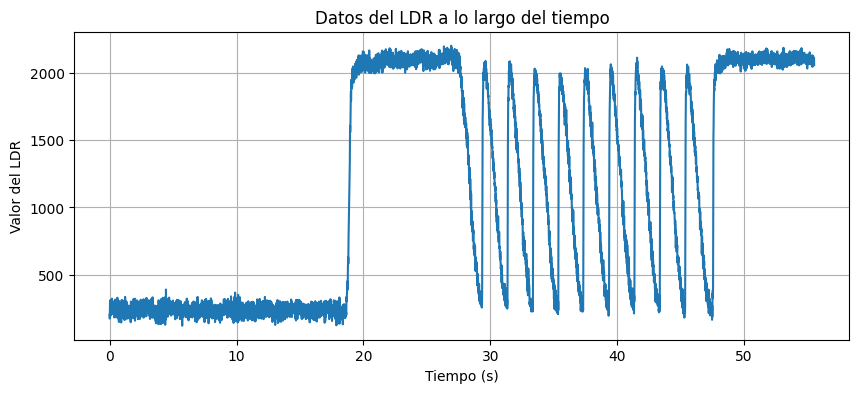

In [282]:
# Frecuencia de muestreo (Hz)
fs = 100

# Creación del vector de tiempo
t = np.arange(len(ldr_data)) / fs

# Graficar
plt.figure(figsize=(10, 4))
plt.plot(t, ldr_data)
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor del LDR')
plt.title('Datos del LDR a lo largo del tiempo')
plt.grid(True)
plt.show()

In [283]:
# Verificamos la longitud de los ejes
print(len(t))
print(len(ldr_data))

5554
5554


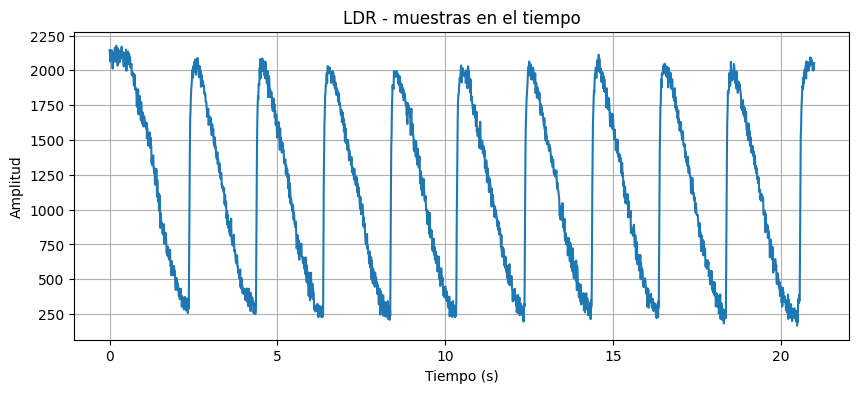

In [288]:
# Acotamos el grafico a la muestra tomada

tc1 = 27  # tiempo de corte 1
tc2 = 48  # tiempo de corte 2
t1 = tc1*fs # numero de muetra en t = tc1 [segundos]
t2 = tc2*fs # numero de muetra en t = tc2 [segundos]

ldr_acot = ldr_data[t1:t2]  # nos quedamos con el tramo util de la muestra
t_acot = np.arange(len(ldr_acot)) / fs  # recalculamos el vector de tiempo


graficar_t_VS_muestras(t_acot, ldr_acot, xlabel='Tiempo (s)', ylabel='Amplitud', titulo='LDR - muestras en el tiempo', grid=True)

## FFT

Aplicamos la transformada rapida de Fourier a la señal acotada

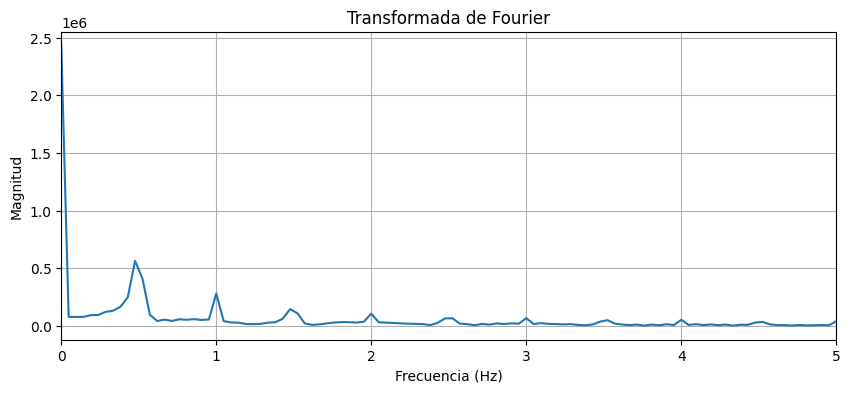

In [322]:
# Calcula la FFT de la señal
fft(ldr_acot, fs, xlim=(0,5), ylim=None, xlabel='Frecuencia (Hz)', ylabel='Magnitud', titulo='Transformada de Fourier', grid=True)

***Análisis del gráfico FFT (muestra acotada):***  
1. Podemos apreciar un pico cerca de la frecuencia de 0 Hz, esto puede representar la parte casi-contínua que obtuvimos antes y después de la muestra como tal.  
2. Es posible visualizar que, existe una frecuencia fundamental rondando los 0,5 Hz y lugo le suceden sus respectivos armónicos cada medio Hert.  

Que pasa si le aplicamos la fft a la señal original sin acotar?...

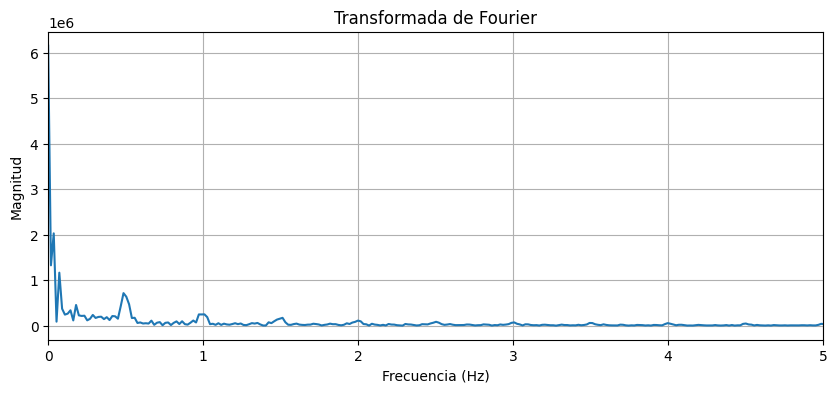

In [323]:
fft(ldr_data, fs, xlim=(0,5), ylim=None, xlabel='Frecuencia (Hz)', ylabel='Magnitud', titulo='Transformada de Fourier', grid=True)

***Análisis del gráfico FFT (muestra original):***  
1.  
2.

#Bibliografía

https://www.luisllamas.es/medir-nivel-luz-con-arduino-y-fotoresistencia-ldr/